In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots, quality_stats

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
result_files = [
    "A_10_1_results.csv",
    "A_20_2_results.csv",
    "A_30_3_results.csv",
    "A_norandom_40_1_results.csv",
    "A_norandom_40_2_results.csv",
    "A_norandom_40_3_results.csv",
    "A_norandom_40_4_results.csv"
]
#indices go from 0 to 6

filename = result_files[0]

In [3]:
print("This evaluation is for: " + filename)

This evaluation is for: A_10_1_results.csv


In [4]:
df = import_dataframe("result_files/"+filename)
filename = filename.split("_results.csv")[0]
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'fixed_reticulation_prob', 'runtime_raxml', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'use_partitioned_msa', 'n_reticulations_inferred',
       'bic_true', 'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml',
       'logl_raxml', 'rf_absolute_raxml', 'rf_relative_raxml',
       'rf_absolute_inferred', 'rf_relative_inferred', 'msa_patterns',
       'unrooted_softwired_network_distance',
       'unrooted_hardwired_network_distance',
       'unrooted_displayed_trees_distance',
       'rooted_softwired_network_distance',
       'rooted_hardwired_ne

# Original Simulated Dataset Statistics 

Total number of datasets: 100


<Figure size 1200x800 with 0 Axes>

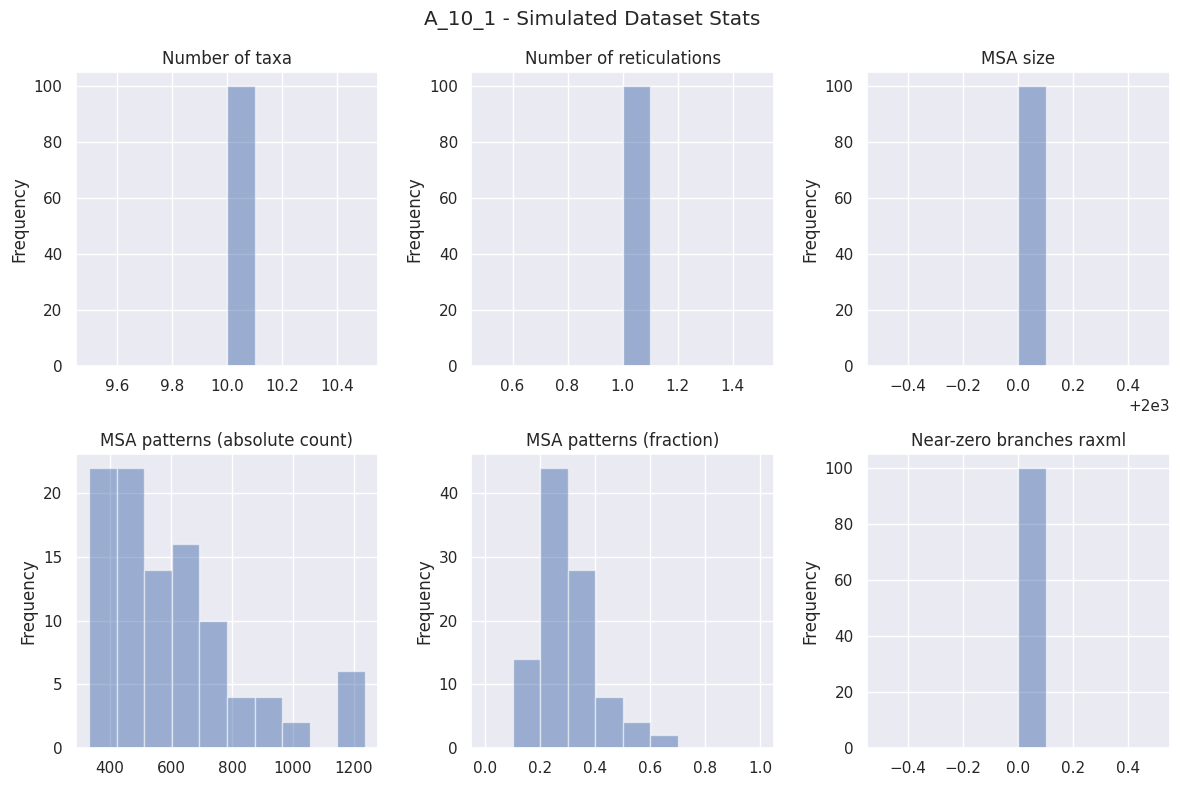

In [5]:
show_stats(filename, df.query('likelihood_type == "AVERAGE"'))

# Evaluation starting from raxml-ng best tree

+----------------------------------+----------------+--------------+
|         A_10_1_norandom          | LhType.AVERAGE | LhType.BEST  |
+----------------------------------+----------------+--------------+
|   Inferred BIC better or equal   |  24 (48.00 %)  | 25 (50.00 %) |
|   Inferred AIC better or equal   |  20 (40.00 %)  | 21 (42.00 %) |
|  Inferred AICc better or equal   |  20 (40.00 %)  | 21 (42.00 %) |
|        Inferred BIC worse        |  26 (52.00 %)  | 25 (50.00 %) |
|        Inferred AIC worse        |  30 (60.00 %)  | 29 (58.00 %) |
|       Inferred AICc worse        |  30 (60.00 %)  | 29 (58.00 %) |
|  Inferred logl better or equal   |  19 (38.00 %)  | 20 (40.00 %) |
|       Inferred logl worse        |  31 (62.00 %)  | 30 (60.00 %) |
|  Inferred n_reticulations less   |  9 (18.00 %)   | 12 (24.00 %) |
|  Inferred n_reticulations equal  |  41 (82.00 %)  | 38 (76.00 %) |
|  Inferred n_reticulations more   |   0 (0.00 %)   |  0 (0.00 %)  |
| Unrooted softwired distance zero

<Figure size 1200x800 with 0 Axes>

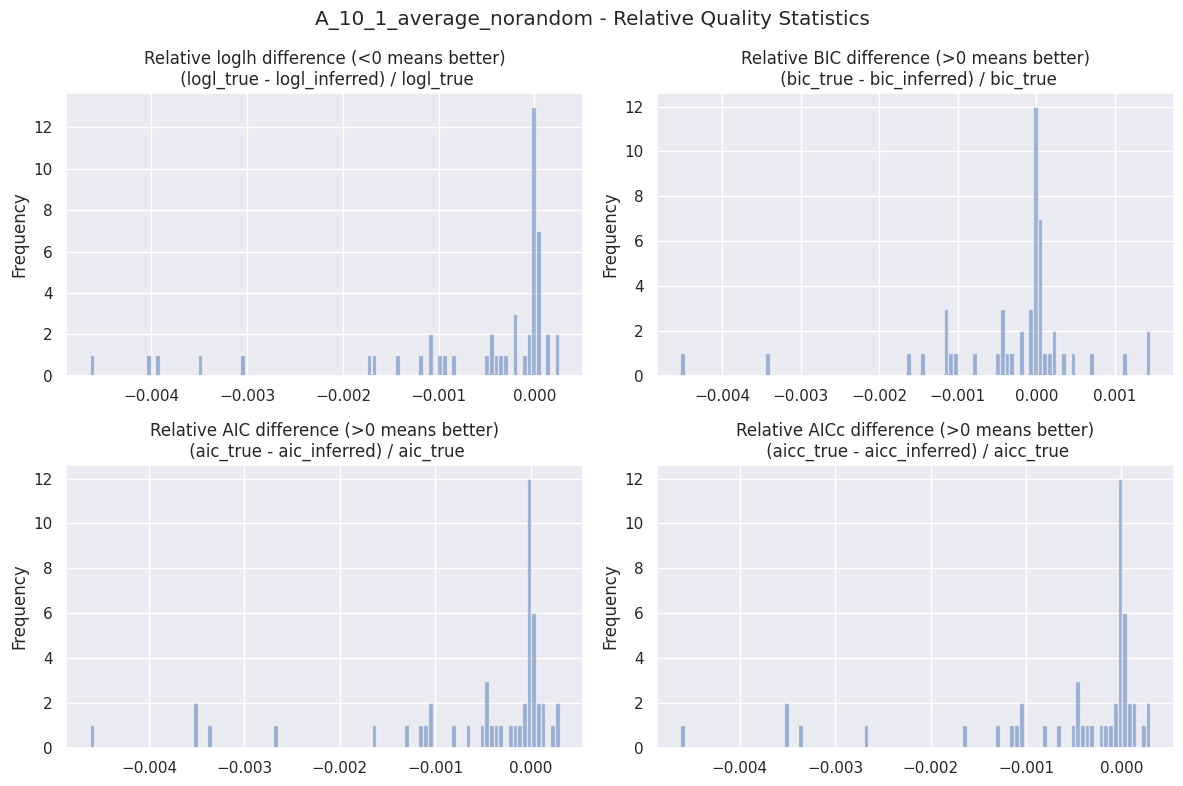

<Figure size 1200x800 with 0 Axes>

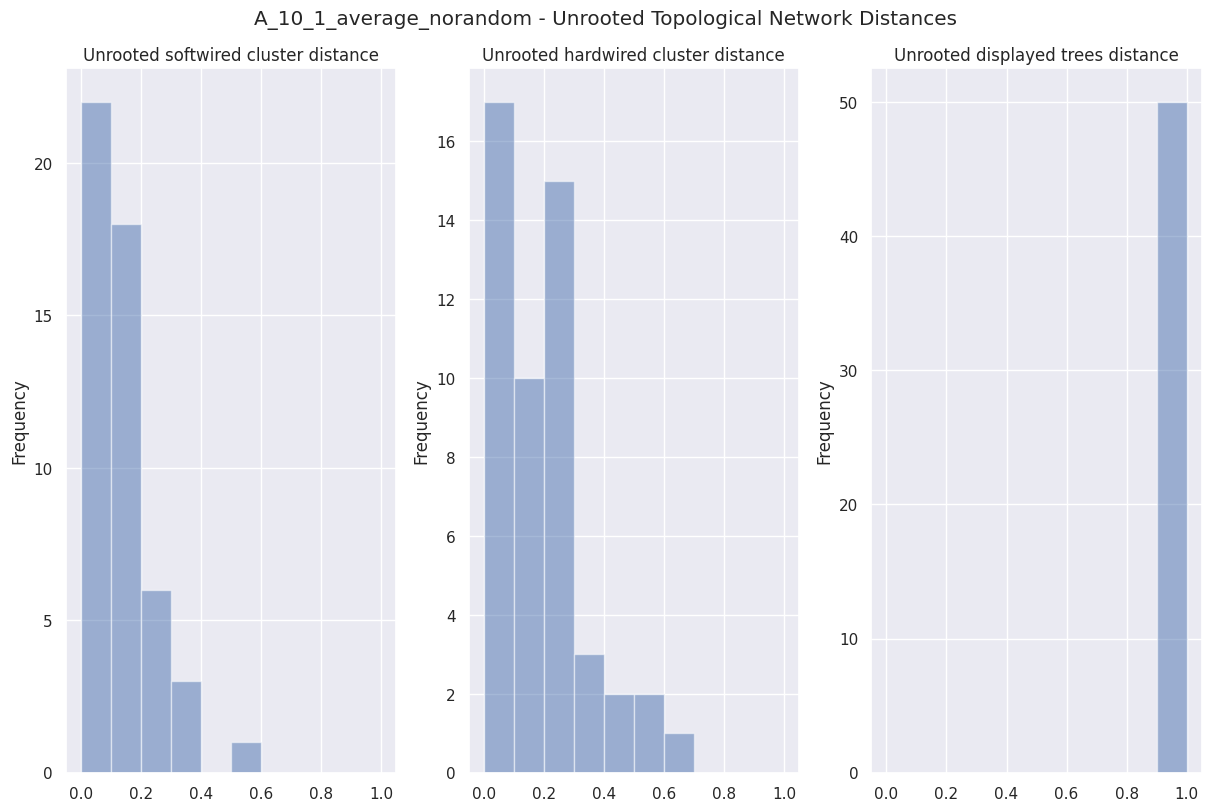

<Figure size 1200x800 with 0 Axes>

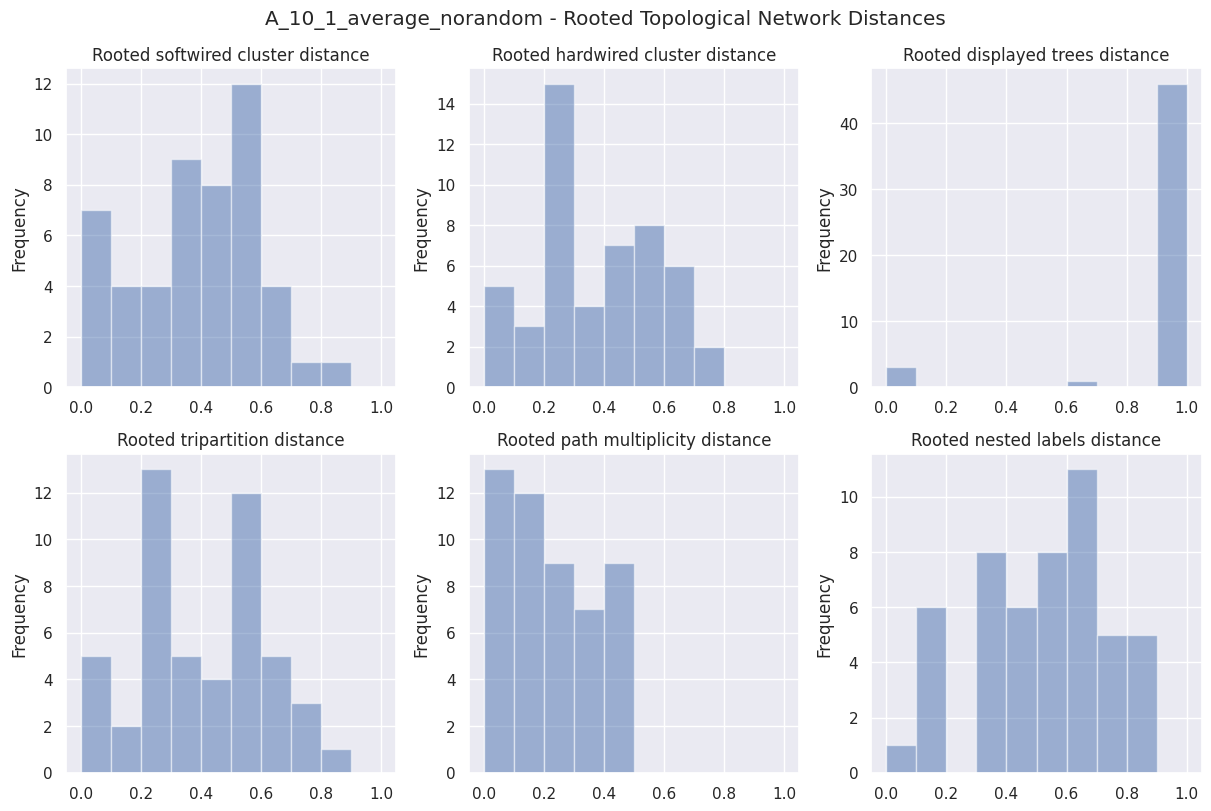

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  count &       mean &        std &        min &        10\% &        25\% &       50\% &       75\% &        90\% &        max \\
\midrule
n\_reticulations\_inferred            &   50.0 &   0.820000 &   0.388088 &   0.000000 &   0.000000 &   1.000000 &  1.000000 &  1.000000 &   1.000000 &   1.000000 \\
bic\_diff                            &   50.0 &  -4.420361 &  18.146684 & -71.946240 & -23.289644 &  -8.825367 & -0.345645 &  0.707488 &   8.160995 &  39.836400 \\
bic\_diff\_relative                   &   50.0 &  -0.000280 &   0.000986 &  -0.004531 &  -0.001156 &  -0.000426 & -0.000016 &  0.000034 &   0.000368 &   0.001452 \\
aic\_diff                            &   50.0 & -10.110872 &  18.584628 & -71.946230 & -29.855933 & -13.985325 & -0.794100 &  0.274478 &   1.858384 &   8.222450 \\
aic\_diff\_relative                   &   50.0 &  -0.000573 &   0.001103 &  -0.004623 &  -0.001758 &  -0.000618 & -0.000039 &  0.000015 &   0.000068 &   0.00030

<Figure size 1200x800 with 0 Axes>

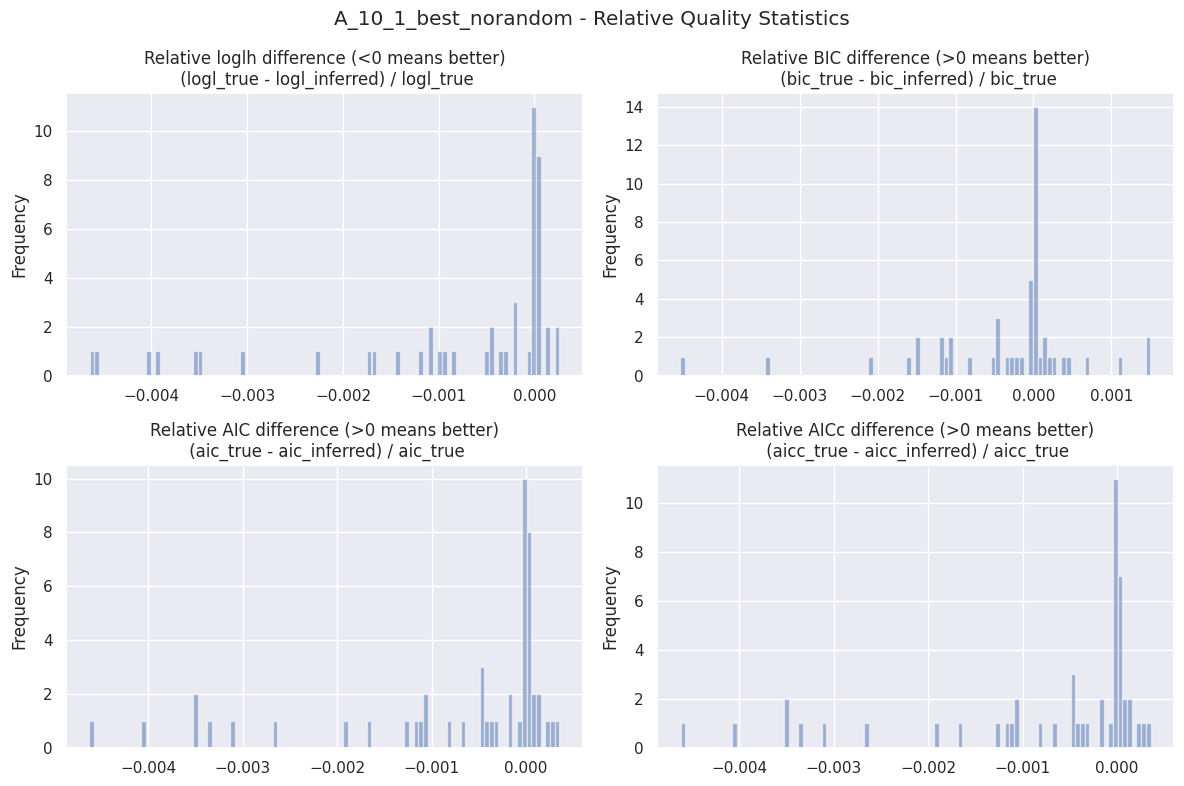

<Figure size 1200x800 with 0 Axes>

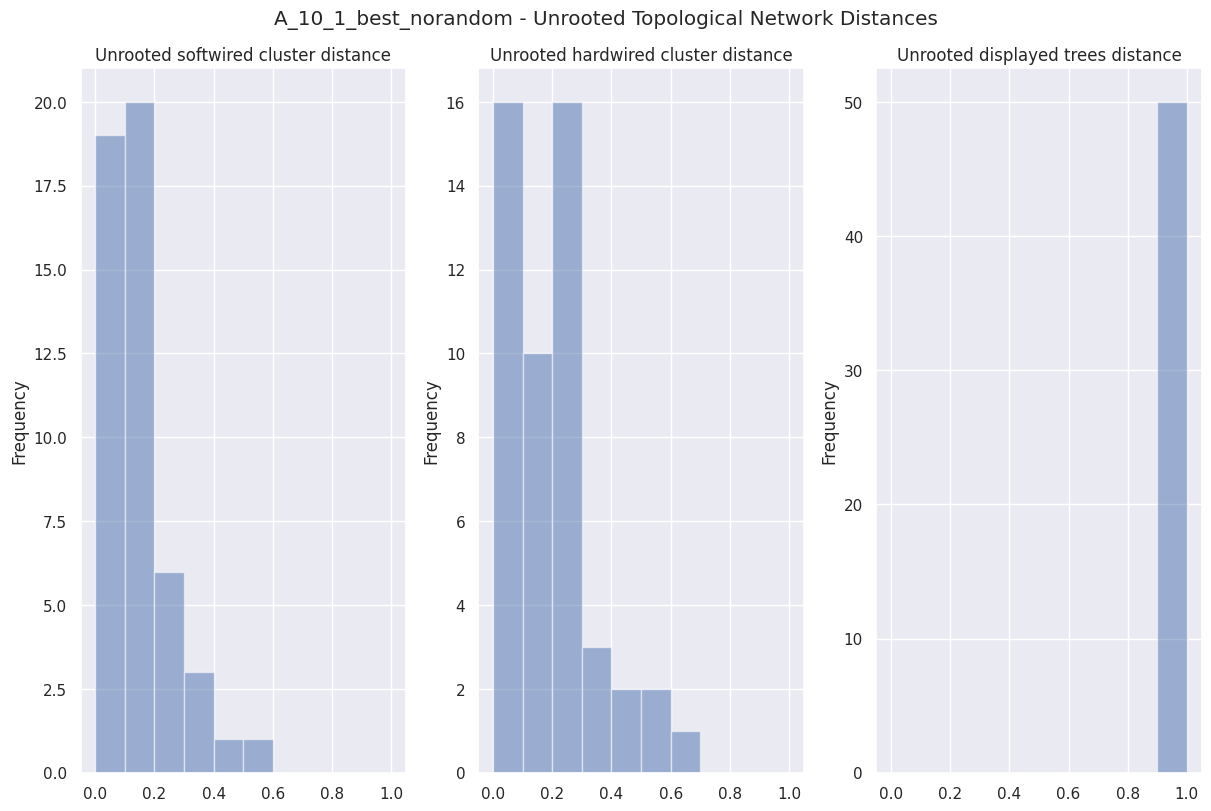

<Figure size 1200x800 with 0 Axes>

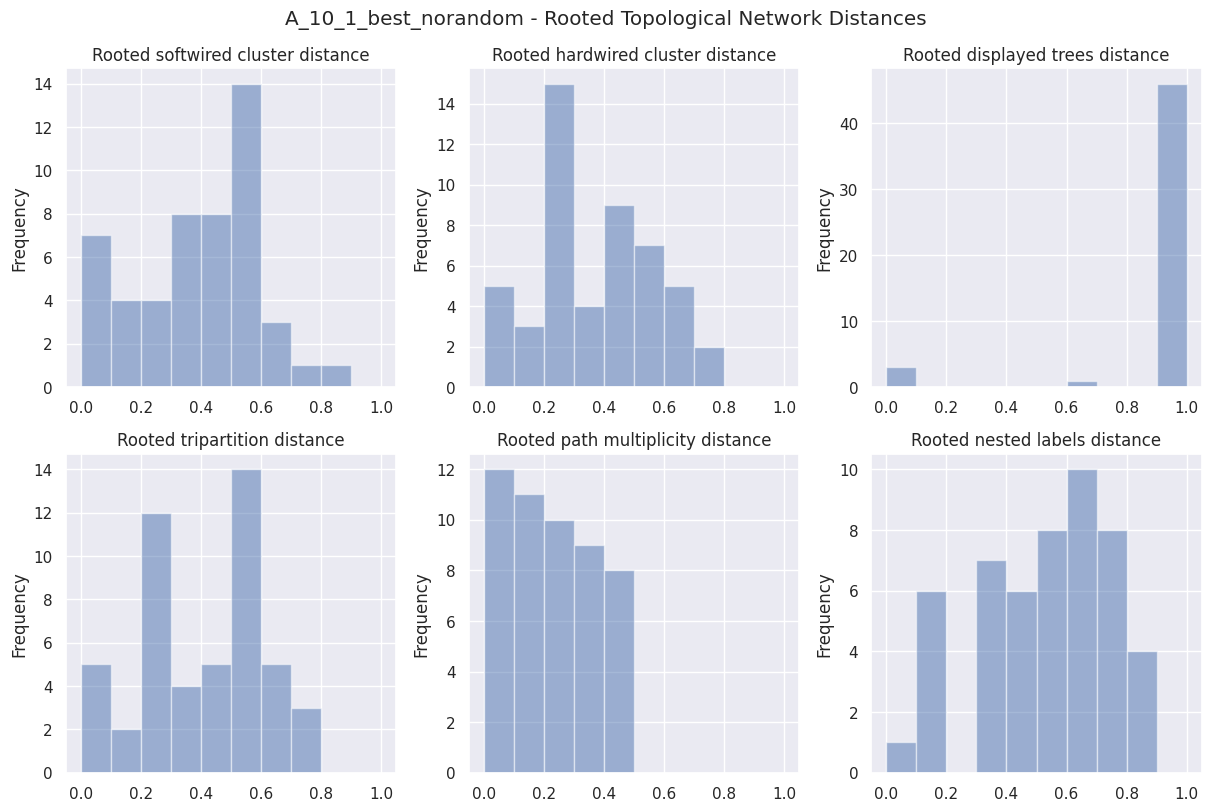

In [8]:
df_start_from_raxml = df.query('start_type == "FROM_RAXML"')
if len(df_start_from_raxml) > 0:
    df_less_cols_average = df_start_from_raxml.query('likelihood_type == "AVERAGE"')[['n_reticulations_inferred', 'bic_diff', 'bic_diff_relative', 'aic_diff', 'aic_diff_relative', 'aicc_diff', 'aicc_diff_relative', 'logl_diff', 'logl_diff_relative', 'unrooted_softwired_network_distance', 'unrooted_hardwired_network_distance', 'unrooted_displayed_trees_distance', 'rooted_softwired_network_distance', 'rooted_hardwired_network_distance', 'rooted_displayed_trees_distance', 'rooted_tripartition_distance', 'rooted_path_multiplicity_distance', 'rooted_nested_labels_distance' ]]
    print(df_less_cols_average.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).transpose().to_latex())
    
    df_less_cols_best = df_start_from_raxml.query('likelihood_type == "BEST"')[['n_reticulations_inferred', 'bic_diff', 'bic_diff_relative', 'aic_diff', 'aic_diff_relative', 'aicc_diff', 'aicc_diff_relative', 'logl_diff', 'logl_diff_relative', 'unrooted_softwired_network_distance', 'unrooted_hardwired_network_distance', 'unrooted_displayed_trees_distance', 'rooted_softwired_network_distance', 'rooted_hardwired_network_distance', 'rooted_displayed_trees_distance', 'rooted_tripartition_distance', 'rooted_path_multiplicity_distance', 'rooted_nested_labels_distance' ]]
    print(df_less_cols_best.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).transpose().to_latex())
    
    quality_stats(filename+"_norandom", df_start_from_raxml)
    show_plots(filename+"_average_norandom", df_start_from_raxml.query('likelihood_type == "AVERAGE"'))
    show_plots(filename+"_best_norandom", df_start_from_raxml.query('likelihood_type == "BEST"'))
else:
    print("No data found for StartType.FROM_RAXML")

# Evaluation starting from 3 random + 3 parsimony trees

+----------------------------------+----------------+--------------+
|          A_10_1_random           | LhType.AVERAGE | LhType.BEST  |
+----------------------------------+----------------+--------------+
|   Inferred BIC better or equal   |  27 (54.00 %)  | 28 (56.00 %) |
|   Inferred AIC better or equal   |  23 (46.00 %)  | 24 (48.00 %) |
|  Inferred AICc better or equal   |  23 (46.00 %)  | 24 (48.00 %) |
|        Inferred BIC worse        |  23 (46.00 %)  | 22 (44.00 %) |
|        Inferred AIC worse        |  27 (54.00 %)  | 26 (52.00 %) |
|       Inferred AICc worse        |  27 (54.00 %)  | 26 (52.00 %) |
|  Inferred logl better or equal   |  22 (44.00 %)  | 23 (46.00 %) |
|       Inferred logl worse        |  28 (56.00 %)  | 27 (54.00 %) |
|  Inferred n_reticulations less   |  7 (14.00 %)   | 7 (14.00 %)  |
|  Inferred n_reticulations equal  |  43 (86.00 %)  | 43 (86.00 %) |
|  Inferred n_reticulations more   |   0 (0.00 %)   |  0 (0.00 %)  |
| Unrooted softwired distance zero

<Figure size 1200x800 with 0 Axes>

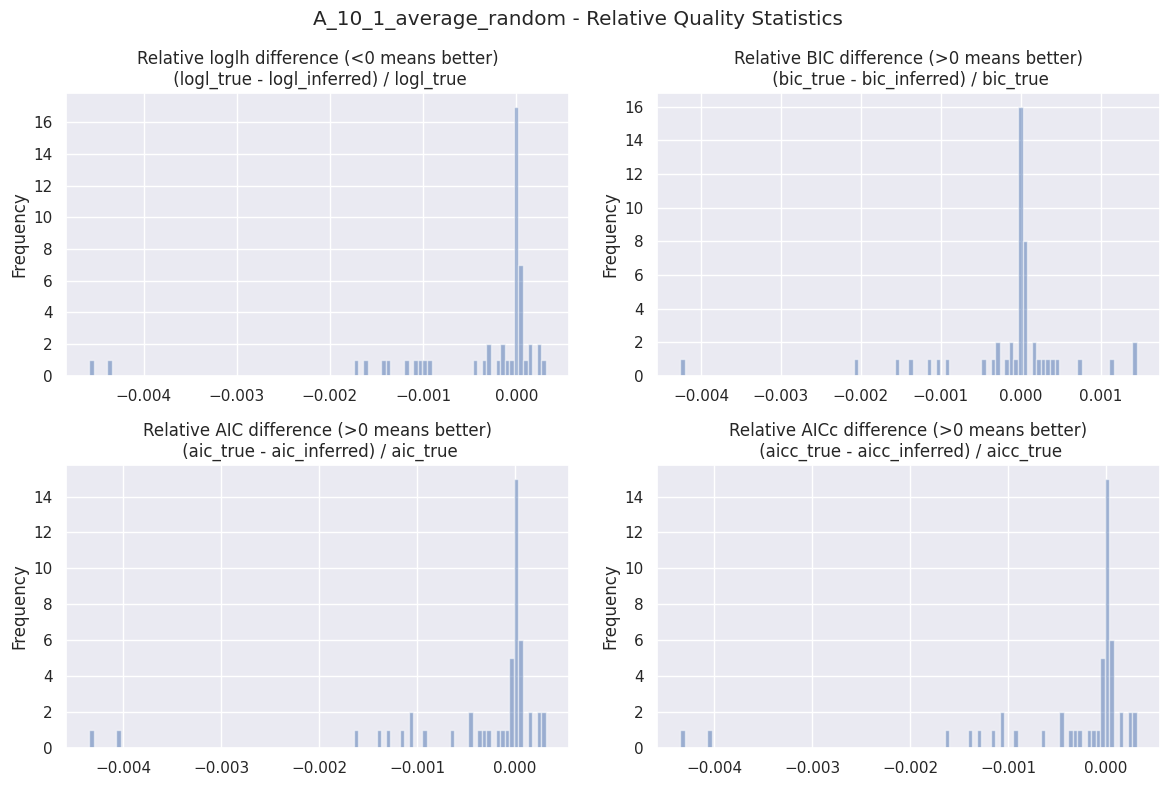

<Figure size 1200x800 with 0 Axes>

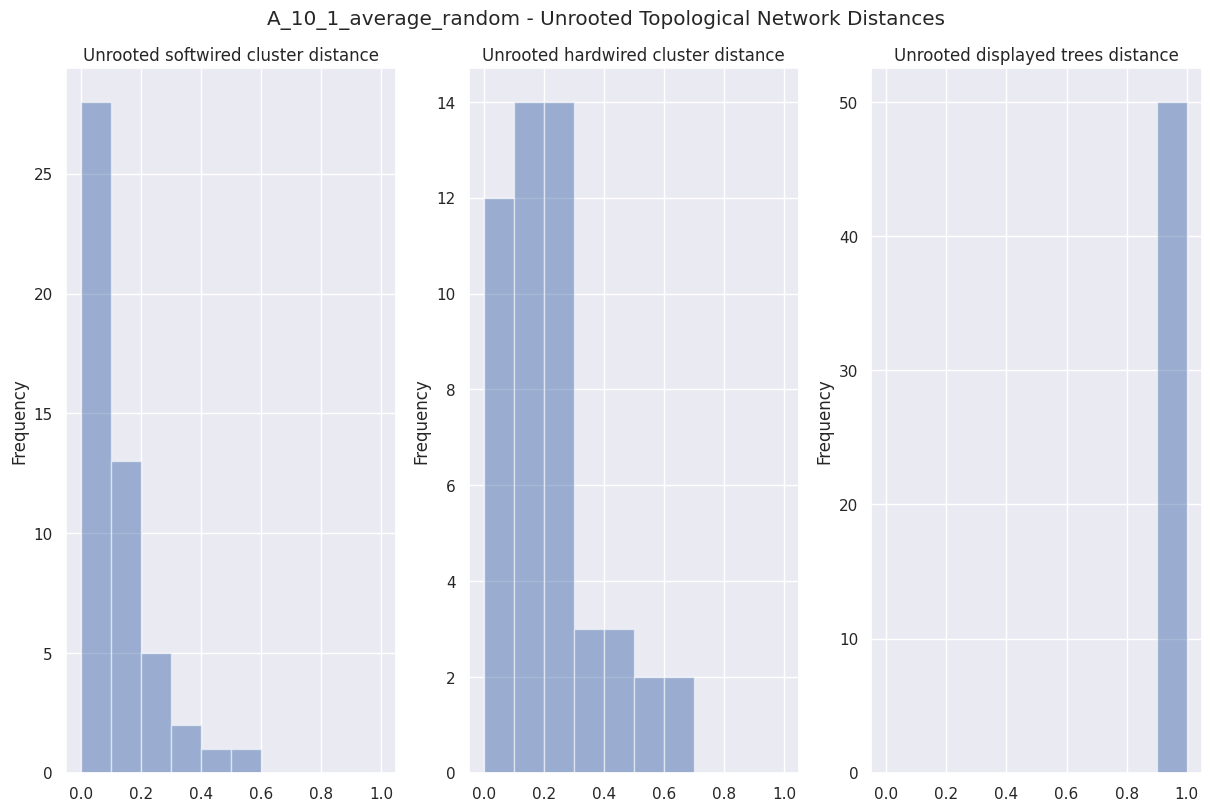

<Figure size 1200x800 with 0 Axes>

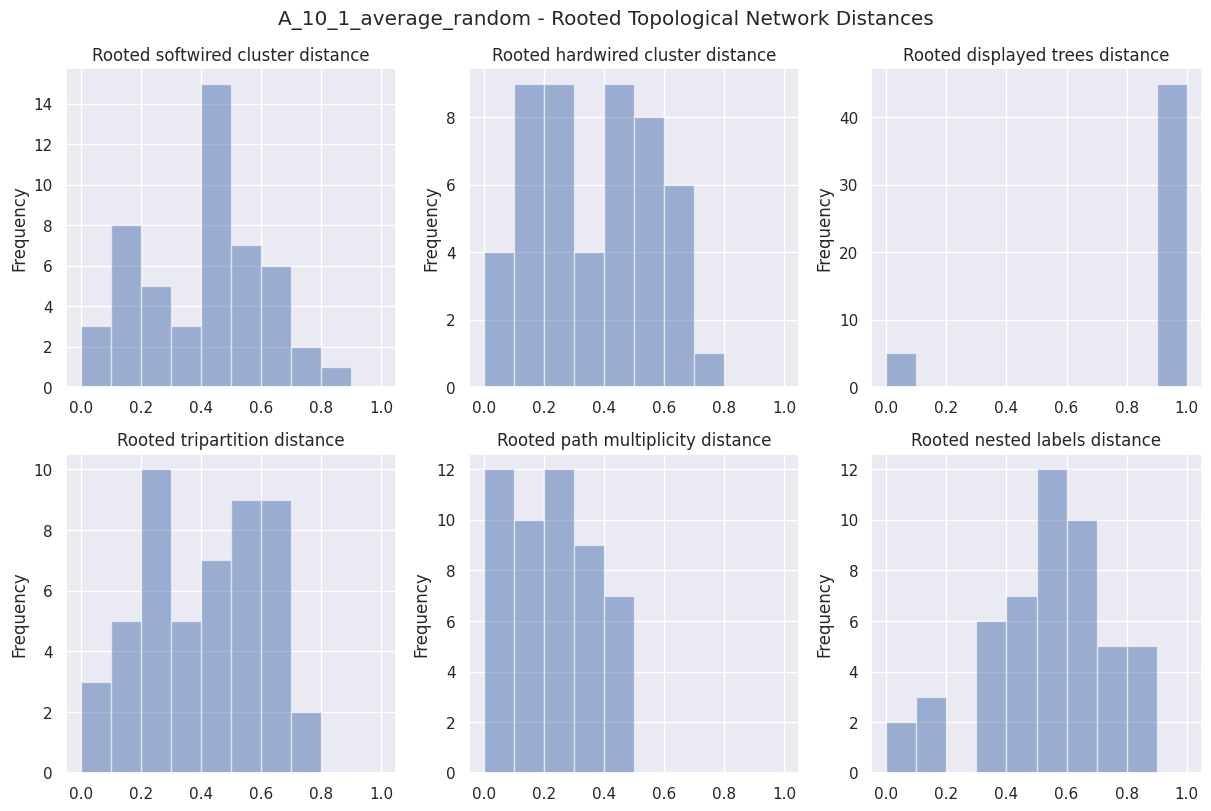

<Figure size 1200x800 with 0 Axes>

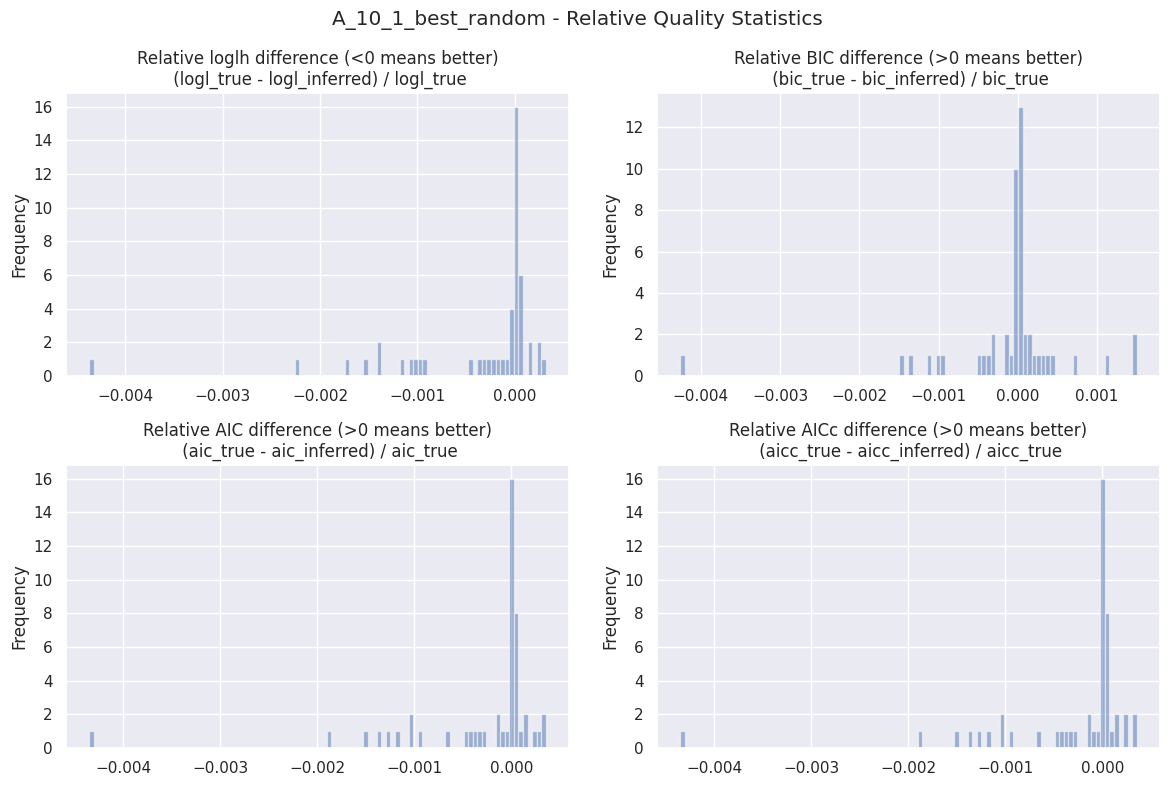

<Figure size 1200x800 with 0 Axes>

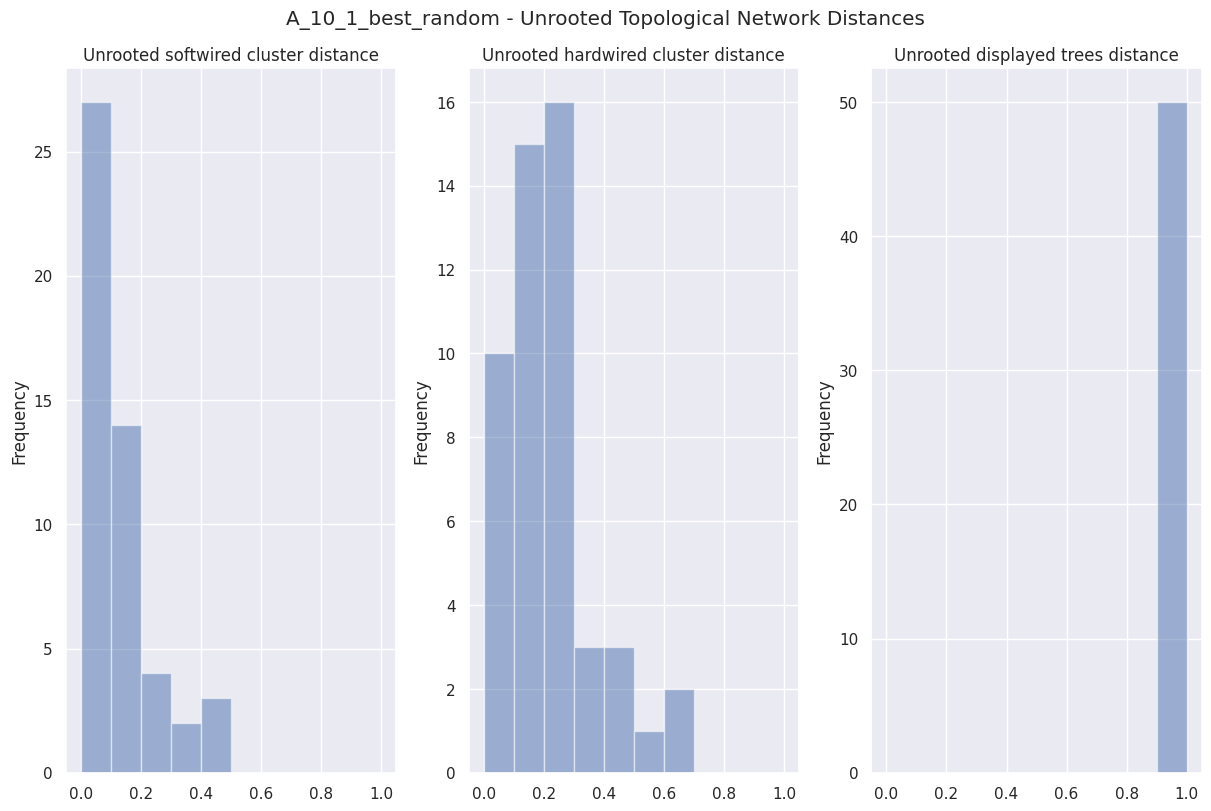

<Figure size 1200x800 with 0 Axes>

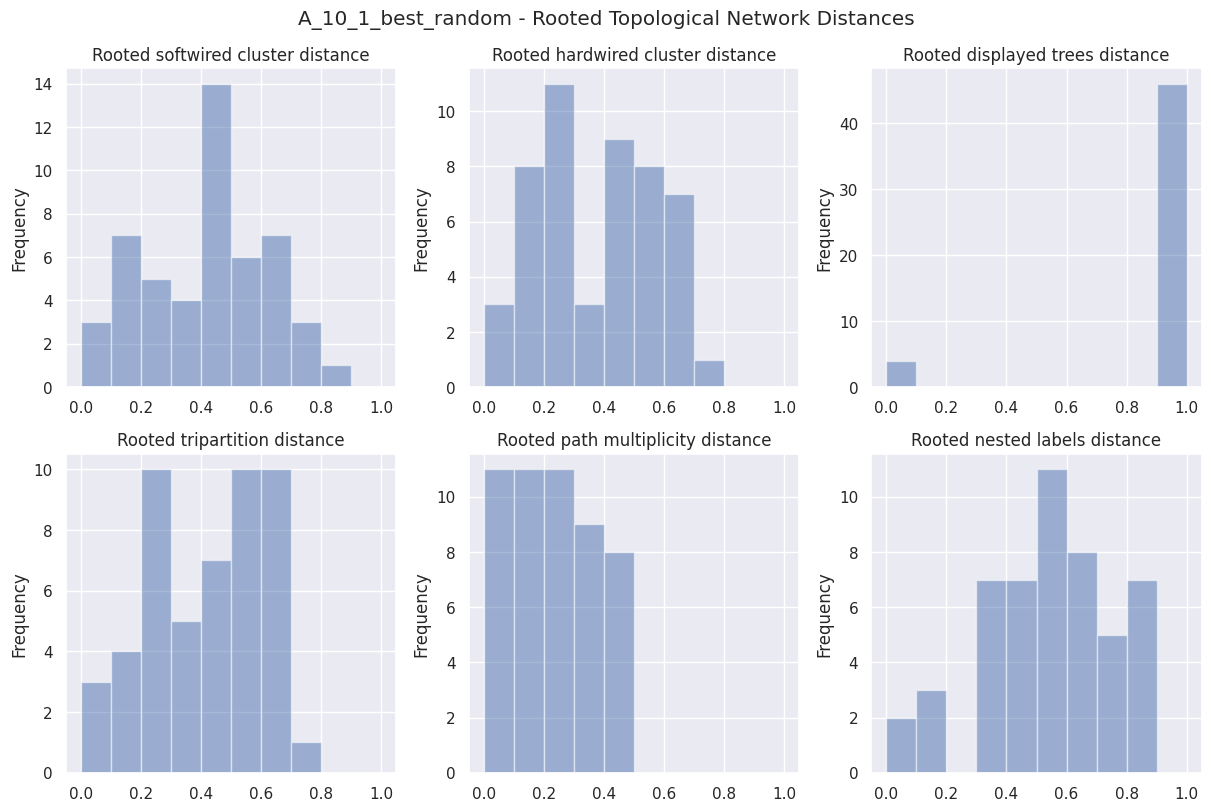

In [7]:
df_random = df.query('start_type == "RANDOM"')

if len(df_random) > 0:
    quality_stats(filename+"_random", df_random)
    show_plots(filename+"_average_random", df_random.query('likelihood_type == "AVERAGE"'))
    show_plots(filename+"_best_random", df_random.query('likelihood_type == "BEST"'))
else:
    print("No data found for StartType.RANDOM")